# PROJET ENERGIE - CLASSIFICATION AU NIVEAU NATIONAL
**Step 1 :**
Élaboration des premières itérations de modélisation.
Analysez vos premiers résultats, votre approche est-elle pertinente ? Et votre modèle ?

**Step 2 :**
Interprétation : Utilisez les métriques de Machine Learning et de statistiques afin d’exploiter et comprendre au mieux les résultats de votre modèle.
Optimisation : Essayer d’améliorer votre modèle à l’aide d’outils d’optimisation, vous pouvez essayer d’autres modèles plus complexes et comparer les résultats.
Conclusions scientifiques et métiers en fonction du succès ou de l’échec de la modélisation.

**Affichage du fichier de données nettoyées :**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Energie/df_national_nettoye.csv')
df.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,2013,1,1,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,2013,1,4,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,2013,1,5,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,2013,1,8,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,2013,1,9,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Année                        3215 non-null   int64  
 1   Mois                         3215 non-null   int64  
 2   Jour                         3215 non-null   int64  
 3   Saison                       3215 non-null   int64  
 4   Consommation (MW)            3215 non-null   float64
 5   Production (MW)              3215 non-null   float64
 6   Energies renouvelables (MW)  3215 non-null   float64
 7   Température moyenne (°C)     3215 non-null   float64
 8   Température référence (°C)   3215 non-null   float64
 9   Thermique (MW)               3215 non-null   float64
 10  Nucléaire (MW)               3215 non-null   float64
 11  Eolien (MW)                  3215 non-null   float64
 12  Solaire (MW)                 3215 non-null   float64
 13  Hydraulique (MW)  

In [7]:
df.isna().sum().sum()

0

**Mise au format approprié de la colonne Année**

In [8]:
df['Année'] = pd.to_datetime(df['Année'])
df['Année'] = df['Année'].apply(lambda x: x.strftime('%Y'))
df.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,1970,1,1,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,1970,1,4,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,1970,1,5,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,1970,1,8,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,1970,1,9,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


**Encoder la colonne Saison**

In [9]:
df['Saison']=df['Saison'].replace(to_replace = ['Hiver', 'Printemps', 'Eté', 'Automne'], value= ['0','1','2','3']).astype(int)
df.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,1970,1,1,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,1970,1,4,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,1970,1,5,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,1970,1,8,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,1970,1,9,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


**Partie: Modèle de classification**

Standardisation des données et préparation des premiers modèles (Suppression des colonnes Energies renouvelables, Production, Température de référence)

In [10]:
#TEST 1
# Découpage en train/test et Encodage de la variable cible
#Maintien des variables des différents types de production
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
df_un = df.drop(columns=['Energies renouvelables (MW)','Production (MW)','Température référence (°C)'])
df_un.head()

y = df_un['Consommation (MW)']
X = df_un.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#Standardisation des données
cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.fit_transform(X_test[cols])

df['Consommation (MW)']= pd.qcut(df['Consommation (MW)'], q=4, labels= False)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y_train)
le.fit_transform(y_test)

<ipython-input-10-d5cc81851ad2>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
<ipython-input-10-d5cc81851ad2>:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:,cols] = sc.fit_transform(X_test[cols])


array([600, 118,  64, 185, 576, 349, 493, 377, 431, 122, 129, 580, 642,
       293, 591, 633,  83, 517, 186,  97,  27, 119, 216,  16, 525, 281,
        39,   7, 448, 159, 424, 540, 456, 439, 312, 150,  77, 408,  72,
       135, 102, 503, 343, 623, 376, 198, 244, 412, 560, 437, 279, 272,
       526,  71,  29, 638,  92, 391, 479, 469, 562,  33,  59,  25, 364,
         9, 170, 496, 584, 257, 262, 289, 422, 319, 227, 394, 308, 144,
       389, 495, 354, 303, 123, 440,  79, 463, 420,  50, 230, 510, 607,
       491, 378, 235,  31, 267, 295, 505, 341, 593, 263, 405, 520, 610,
       323, 385, 592, 370, 276, 344,   5, 550,  24, 229, 602, 566, 530,
        48, 531,  93, 451, 138, 172, 195, 381, 506, 148, 575, 581, 481,
       189, 361, 132, 160, 101, 206, 397, 252, 300, 614, 524, 454, 499,
       515, 421, 246, 253,  80, 444, 583, 468,  69, 568,  94, 541, 226,
       130,  95, 178, 367, 143, 574, 500, 489, 238, 207, 310, 484, 120,
       111, 157, 490,  30, 535,  44,  78, 417, 399, 251, 365, 62

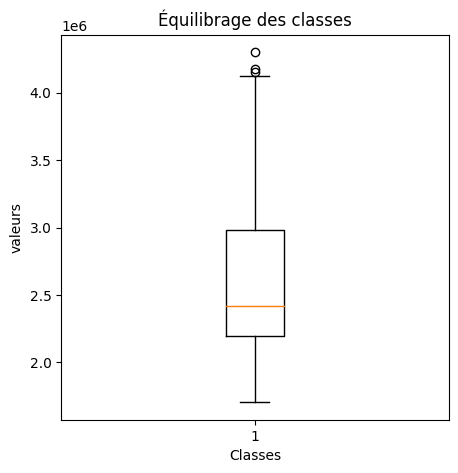

In [11]:
#Affichage de l'équilibrage des données classées
import matplotlib.pyplot as plt

# Données d'exemple
classes = y

# Affichage du diagramme en barres
plt.figure(figsize = (5,5))
plt.boxplot(classes)

# Ajout d'un titre et des labels des axes
plt.title("Équilibrage des classes")
plt.xlabel("Classes")
plt.ylabel("valeurs")

# Affichage du graphique
plt.show()

In [12]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl1 = rl.predict(X_test)
pred_rl_train1 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl1[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl1, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl1))

Prédictions sur les 5 premières lignes :
1309     17356.0
139    -245492.0
3028     84785.0
1161    -74372.0
1023   -675298.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.5213841368584758
Coefficient de détermination du modèle sur test: 0.0


Prédictions,1709708.0,1742220.0,1762408.0,1768065.0,1771767.0,1773863.0,1778740.0,1783824.0,1800799.0,1820436.0,...,3786767.0,3791914.0,3823833.0,3851051.0,3900398.0,4011457.0,4013425.0,4059942.0,4157497.0,4176584.0
Réalité,,,,,,,,,,,,,,,,,,,,,
1708279.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1742986.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1752972.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764341.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817397.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820634.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3917136.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   1708279.0       0.00      0.00      0.00       1.0
   1709708.0       0.00      0.00      0.00       0.0
   1742220.0       0.00      0.00      0.00       0.0
   1742986.0       0.00      0.00      0.00       1.0
   1752972.0       0.00      0.00      0.00       1.0
   1760235.0       0.00      0.00      0.00       1.0
   1762408.0       0.00      0.00      0.00       0.0
   1764341.0       0.00      0.00      0.00       1.0
   1768065.0       0.00      0.00      0.00       0.0
   1771767.0       0.00      0.00      0.00       0.0
   1773863.0       0.00      0.00      0.00       0.0
   1778740.0       0.00      0.00      0.00       0.0
   1779705.0       0.00      0.00      0.00       1.0
   1783824.0       0.00      0.00      0.00       0.0
   1789812.0       0.00      0.00      0.00       1.0
   1795953.0       0.00      0.00      0.00       1.0
   1796530.0       0.00      0.00      0.00       1.0
   1799973.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [13]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn1 = knn.predict(X_test)
pred_knn_train1 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn1[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn1, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn1))

Prédictions sur les 5 premières lignes :
1309    304719.0
139      94453.0
3028    139423.0
1161    -37581.0
1023    256655.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.1442457231726283
Coefficient de détermination du modèle sur test: 0.0


Prédictions,1704114.0,1709708.0,1742220.0,1761698.0,1762408.0,1768065.0,1773863.0,1777321.0,1777435.0,1778740.0,...,3510366.0,3529932.0,3545068.0,3560641.0,3564000.0,3568644.0,3593600.0,3601721.0,3679563.0,3921817.0
Réalité,,,,,,,,,,,,,,,,,,,,,
1708279.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1742986.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1752972.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764341.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817397.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3820634.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3917136.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


              precision    recall  f1-score   support

   1704114.0       0.00      0.00      0.00       0.0
   1708279.0       0.00      0.00      0.00       1.0
   1709708.0       0.00      0.00      0.00       0.0
   1742220.0       0.00      0.00      0.00       0.0
   1742986.0       0.00      0.00      0.00       1.0
   1752972.0       0.00      0.00      0.00       1.0
   1760235.0       0.00      0.00      0.00       1.0
   1761698.0       0.00      0.00      0.00       0.0
   1762408.0       0.00      0.00      0.00       0.0
   1764341.0       0.00      0.00      0.00       1.0
   1768065.0       0.00      0.00      0.00       0.0
   1773863.0       0.00      0.00      0.00       0.0
   1777321.0       0.00      0.00      0.00       0.0
   1777435.0       0.00      0.00      0.00       0.0
   1778740.0       0.00      0.00      0.00       0.0
   1779705.0       0.00      0.00      0.00       1.0
   1783824.0       0.00      0.00      0.00       0.0
   1785648.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [14]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc1 = rfc.predict(X_test)
pred_rfc_train1 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc1[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc1, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc1))

Prédictions sur les 5 premières lignes :
1309     17356.0
139    -201729.0
3028   -244483.0
1161    -44689.0
1023    320999.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.0


Prédictions,1742041.0,1762408.0,1773863.0,1785648.0,1789299.0,1805302.0,1811181.0,1812814.0,1821109.0,1822945.0,...,3758763.0,3763852.0,3769672.0,3771686.0,3779067.0,3786767.0,3823833.0,3900398.0,4157497.0,4176584.0
Réalité,,,,,,,,,,,,,,,,,,,,,
1708279.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1742986.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1752972.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764341.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817397.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3820634.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3917136.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   1708279.0       0.00      0.00      0.00       1.0
   1742041.0       0.00      0.00      0.00       0.0
   1742986.0       0.00      0.00      0.00       1.0
   1752972.0       0.00      0.00      0.00       1.0
   1760235.0       0.00      0.00      0.00       1.0
   1762408.0       0.00      0.00      0.00       0.0
   1764341.0       0.00      0.00      0.00       1.0
   1773863.0       0.00      0.00      0.00       0.0
   1779705.0       0.00      0.00      0.00       1.0
   1785648.0       0.00      0.00      0.00       0.0
   1789299.0       0.00      0.00      0.00       0.0
   1789812.0       0.00      0.00      0.00       1.0
   1795953.0       0.00      0.00      0.00       1.0
   1796530.0       0.00      0.00      0.00       1.0
   1799973.0       0.00      0.00      0.00       1.0
   1805302.0       0.00      0.00      0.00       0.0
   1811181.0       0.00      0.00      0.00       0.0
   1812814.0       0.00    

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc1 = svc.predict(X_test)
pred_svc_train1 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc1[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc1, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc1))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

KeyboardInterrupt: ignored

#Conclusion Test 1
#Nous observons de l'overfitting sur le random forest aléatoire. Le modèle observant les meilleurs résultats est le modèle SVC.
#Nous voyons que la prédiction est meilleure que sur les deux autres modèles étudiés, la précision et le recall sont plus élevés.

In [ ]:
#TEST 2
#Standardisation des données et découpage en train/test
#Intégration de la variable Energie Renouvelable et donc suppression des différentes énergies renouvelables
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_deux = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Production (MW)','Température référence (°C)'])
y = df_deux['Consommation (MW)']
X = df_deux.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.fit_transform(X_test[cols])

In [ ]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl2 = rl.predict(X_test)
pred_rl_train2 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl2[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl2, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl2))

In [ ]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn2 = knn.predict(X_test)
pred_knn_train2 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn2[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn2, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn2))

In [ ]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc2 = rfc.predict(X_test)
pred_rfc_train2 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc2[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc2, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc2))

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc2 = svc.predict(X_test)
pred_svc_train2 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc2[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc2, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc2))

#Conclusion Test 2
#On remarque que sur deux modèles nous perdons de la précision (Support Vector Machine / Régression logistique).
#Toujours un overfitting sur le modèle Random Forest Aléatoire
#Le SVC est le plus intéressant sur ce test

In [ ]:
#TEST 3
#Standardisation des données et découpage en train/test
#Suppression de toutes les colonnes des différents moyens de production pour ne conserver que la variable Production (MW)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_trois = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)','Température référence (°C)'])
y = df_trois['Consommation (MW)']
X = df_trois.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.fit_transform(X_test[cols])

In [ ]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl3 = rl.predict(X_test)
pred_rl_train3 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl3[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl3, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl3))

In [ ]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn3 = knn.predict(X_test)
pred_knn_train3 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn3[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn3, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn3))

In [ ]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc3 = rfc.predict(X_test)
pred_rfc_train3 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc3[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc3, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc3))

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc3 = svc.predict(X_test)
pred_svc_train3 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc3[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc3, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc3))


#Conclusion Test 3 : Pas d'amélioration sur ces tests on obtient des résultats semblables au premier test

In [ ]:
#TEST 4
#Standardisation des données et découpage en train/test
#Avec les températures et sans la production
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_quatre = df.drop(columns=['Production (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)','Température référence (°C)'])

y = df_quatre['Consommation (MW)']
X = df_quatre.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.fit_transform(X_test[cols])

In [ ]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl4 = rl.predict(X_test)
pred_rl_train4 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl4[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl4, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl4))

In [ ]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn4 = knn.predict(X_test)
pred_knn_train4 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn4[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn4, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn4))

In [ ]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc4 = rfc.predict(X_test)
pred_rfc_train4 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc4[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc4, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc4))

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc4 = svc.predict(X_test)
pred_svc_train4 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc4[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc4, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc4))

#Conclusion Test 4:
#On constate que sans la variable production, la précision des prédictions est plus faible que sur les autres tests.
#Nous allons donc réintégrer cette variable

In [ ]:
#TEST 5
#Standardisation des données et découpage en train/test
#Sans la témpérature, ni la date et avec seulement la production globale (variable la plus corrélée à la consommation, voir Heatmap)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_cinq = df.drop(columns=['Température moyenne (°C)','Année', 'Mois','Jour', 'Saison','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)','Température référence (°C)'])

y = df_cinq['Consommation (MW)']
X = df_cinq.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl5 = rl.predict(X_test)
pred_rl_train5 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl5[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl5, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl5))

In [ ]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn5 = knn.predict(X_test)
pred_knn_train5 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn5[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn5, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn5))

In [ ]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc5 = rfc.predict(X_test)
pred_rfc_train5 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc5[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc5, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc5))

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc5 = svc.predict(X_test)
pred_svc_train5 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc5[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc5, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc5))

#Conclusion Test 5:
#On remarque une énorme perte de précison dans les prédictions et une chute des coefficients de détermination trouvées en comparaison avec les autres tests.

In [ ]:
#TEST 6
#Standardisation des données et découpage en train/test
#Sans la production globale ni même les productions les plus faibles
#En temporalité nous gardons seulement les mois
#Energie thermique et nucléaire qui sont les plus fortes productrices
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_six = df.drop(columns=['Année','Jour','Saison','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Production (MW)','Température référence (°C)'])

y = df_six['Consommation (MW)']
X = df_six.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

cols = X.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
#On entraîne un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train, y_train)

pred_rl6 = rl.predict(X_test)
pred_rl_train6 = rl.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rl6[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rl.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rl.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rl6, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rl6))

In [ ]:
#On entraîne un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn6 = knn.predict(X_test)
pred_knn_train6 = knn.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_knn6[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

display(pd.crosstab(y_test, pred_knn6, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_knn6))

In [ ]:
#On entraîne un modèle Random Forest Aléatoire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc6 = rfc.predict(X_test)
pred_rfc_train6 = rfc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_rfc6[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', rfc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_rfc6, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_rfc6))

In [ ]:
#On entraîne un modèle Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

pred_svc6 = svc.predict(X_test)
pred_svc_train6 = svc.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_svc6[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', svc.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', svc.score(X_test, y_test))

display(pd.crosstab(y_test, pred_svc6, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, pred_svc6))

#Conclusion test 6:
#On remarque que les résultats sont semblables au test 2 mais que nous n'atteignons pas les résultats de la partie Modèle de regression.

**Heatmap des matrices de confusion des 2 meilleurs tests**

In [ ]:
#Heatmap des matrices de confusion des modèles du test 1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Affichage des heatmaps
conf_matrix1 = confusion_matrix(y_test, pred_rl1)
sns.heatmap(conf_matrix1, annot=True, cmap='coolwarm',ax=axes[0, 0], fmt ='d')
axes[0, 0].set_title('Régression logistique')

conf_matrix2 = confusion_matrix(y_test, pred_knn1)
sns.heatmap(conf_matrix2, annot=True, cmap='coolwarm',ax=axes[0, 1], fmt ='d')
axes[0, 1].set_title('K Nearest Neighbors')

conf_matrix3 = confusion_matrix(y_test, pred_rfc1)
sns.heatmap(conf_matrix3, annot=True, cmap='coolwarm', ax=axes[1, 0], fmt ='d')
axes[1, 0].set_title('Random Forest Classifier')

conf_matrix4 = confusion_matrix(y_test, pred_svc1)
sns.heatmap(conf_matrix4, annot=True, cmap='coolwarm', ax=axes[1, 1], fmt ='d')
axes[1, 1].set_title('Support Vector Classification')

plt.show();

In [ ]:
#Heatmap des matrices de confusion des modèles du test 2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Affichage des heatmaps

conf_matrix5 = confusion_matrix(y_test, pred_rl2)
sns.heatmap(conf_matrix5, annot=True, cmap='coolwarm',ax=axes[0, 0], fmt ='d')
axes[0, 0].set_title('Régression logistique')

conf_matrix6 = confusion_matrix(y_test, pred_knn2)
sns.heatmap(conf_matrix6, annot=True, cmap='coolwarm',ax=axes[0, 1], fmt ='d')
axes[0, 1].set_title('K Nearest Neighbors')

conf_matrix7 = confusion_matrix(y_test, pred_rfc2)
sns.heatmap(conf_matrix7, annot=True, cmap='coolwarm', ax=axes[1, 0], fmt ='d')
axes[1, 0].set_title('Random Forest Classifier')

conf_matrix8 = confusion_matrix(y_test, pred_svc2)
sns.heatmap(conf_matrix8, annot=True, cmap='coolwarm', ax=axes[1, 1], fmt ='d')
axes[1, 1].set_title('Support Vector Classification')

plt.show();